In [1]:
import numpy as np

# Function to read the LAMMPS output text file and store the data
def read_lammps_output(file_path):
    # Initialize empty lists to store the data
    steps = []
    temps = []
    jx = []
    jy = []
    jz = []
    k11 = []
    k22 = []
    k33 = []

    # Open the file and read the lines
    with open(file_path, 'r') as file:
        # Skip the header line (first line)
        header = file.readline()
        
        # Read the rest of the lines
        for line in file:
            # Split each line into its components (assuming space-separated columns)
            columns = line.split()
            
            # Skip empty lines or lines that don't have enough columns
            if len(columns) < 7:
                continue

            # Extract values and append them to the respective lists
            steps.append(int(columns[0]))         # Step
            temps.append(float(columns[1]))       # Temp
            jx.append(float(columns[2]))          # v_Jx
            jy.append(float(columns[3]))          # v_Jy
            jz.append(float(columns[4]))          # v_Jz
            k11.append(float(columns[5]))         # v_k11
            k22.append(float(columns[6]))         # v_k22
            k33.append(float(columns[7]))         # v_k33

    # Convert the lists to numpy arrays for better performance with numerical operations
    steps = np.array(steps)
    temps = np.array(temps)
    jx = np.array(jx)
    jy = np.array(jy)
    jz = np.array(jz)
    k11 = np.array(k11)
    k22 = np.array(k22)
    k33 = np.array(k33)

    return steps, temps, jx, jy, jz, k11, k22, k33

# Example usage
file_path = "LJsimdata.txt"  # Replace with the path to your data file

# Call the function to read the data
steps, temps, jx, jy, jz, k11, k22, k33 = read_lammps_output(file_path)

# Print the data (example)
print("Steps:", steps[:10])  # Print first 10 steps
print("Temperatures:", temps[:10])  # Print first 10 temperatures
print("v_Jx:", jx[:10])  # Print first 10 Jx values
print(len(steps))

Steps: [    0  2000  4000  6000  8000 10000 12000 14000 16000 18000]
Temperatures: [301.61339 319.9594  305.96179 277.91864 293.28728 316.77638 305.38569
 293.41553 311.51529 292.29487]
v_Jx: [ 3.2636801e-05 -4.6807403e-06  1.3729681e-06  1.4267695e-05
  1.2892171e-06 -9.2555555e-06  3.3027723e-05  2.0550357e-06
  4.9362485e-05 -4.7074956e-05]
51


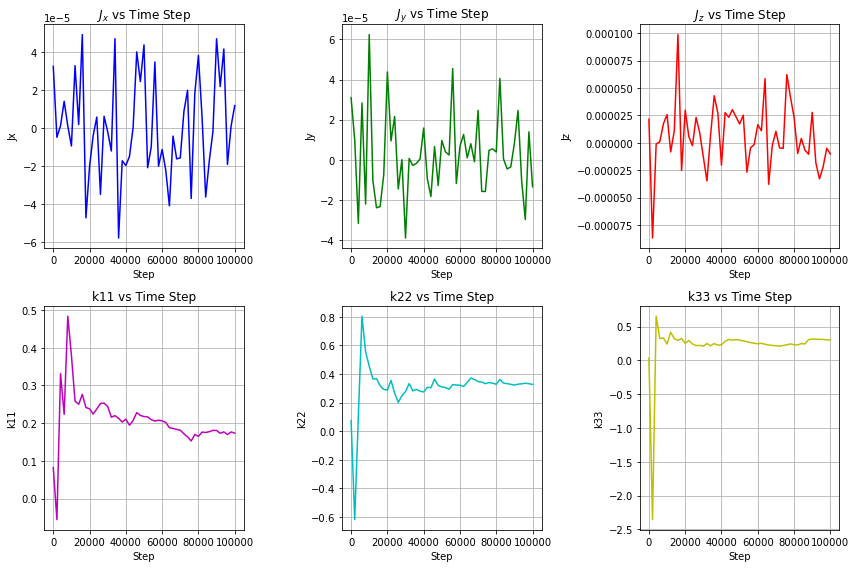

In [2]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(12, 8))

# Plot Jx vs. Step
plt.subplot(2, 3, 1)  # 2 rows, 3 columns, 1st subplot
plt.plot(steps, jx, label='v_Jx', color='b')
plt.xlabel('Step')
plt.ylabel('Jx')
plt.title('$J_x$ vs Time Step')
plt.grid(True)

# Plot Jy vs. Step
plt.subplot(2, 3, 2)  # 2 rows, 3 columns, 2nd subplot
plt.plot(steps, jy, label='v_Jy', color='g')
plt.xlabel('Step')
plt.ylabel('Jy')
plt.title('$J_y$ vs Time Step')
plt.grid(True)

# Plot Jz vs. Step
plt.subplot(2, 3, 3)  # 2 rows, 3 columns, 3rd subplot
plt.plot(steps, jz, label='v_Jz', color='r')
plt.xlabel('Step')
plt.ylabel('Jz')
plt.title('$J_z$ vs Time Step')
plt.grid(True)

# Plot k11 vs. Step
plt.subplot(2, 3, 4)  # 2 rows, 3 columns, 4th subplot
plt.plot(steps, k11, label='v_k11', color='m')
plt.xlabel('Step')
plt.ylabel('k11')
plt.title('k11 vs Time Step')
plt.grid(True)

# Plot k22 vs. Step
plt.subplot(2, 3, 5)  # 2 rows, 3 columns, 5th subplot
plt.plot(steps, k22, label='v_k22', color='c')
plt.xlabel('Step')
plt.ylabel('k22')
plt.title('k22 vs Time Step')
plt.grid(True)

# Plot k33 vs. Step
plt.subplot(2, 3, 6)  # 2 rows, 3 columns, 6th subplot
plt.plot(steps, k33, label='v_k33', color='y')
plt.xlabel('Step')
plt.ylabel('k33')
plt.title('k33 vs Time Step')
plt.grid(True)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [3]:
# full heat flux vector
heatflux_vec = np.vstack((jx, jy, jz)).T
print(heatflux_vec[0])
print(steps[:10])
print(len(heatflux_vec))
print(len(steps))

[3.2636801e-05 3.0983115e-05 2.1487359e-05]
[    0  2000  4000  6000  8000 10000 12000 14000 16000 18000]
51
51


In [4]:
import numpy as np

def dotproduct(heatflux_vec):
    # Create an empty list to store the dot products
    dot_prods = []

    # Iterate over all time steps starting from 1 
    for i in range(0, len(heatflux_vec)):
        for j in range(i+1, len(heatflux_vec)):
            # Calculate the dot product between the vector at time step 0 and time step i
            dotprod = np.dot(heatflux_vec[i], heatflux_vec[j])
            # Append the result to the list
            dot_prods.append(dotprod)

    # Convert the list of dot products to a numpy array and return
    return np.array(dot_prods)

In [5]:
print(len(heatflux_vec))
print(len(dotproduct(heatflux_vec)))

print(sum(range(1, 51)))


51
1275
1275


In [6]:
# Check function is working
print(np.dot(heatflux_vec[1], heatflux_vec[3]))
print(dotproduct(heatflux_vec)[51])

1.368701180279748e-10
1.368701180279748e-10


In [7]:
import numpy as np

def dotproduct_av(heatflux_vec):
    # Create an empty list to store the averaged dot products for each time interval
    avg_dot_prods = []
    
    # Number of time steps
    n_steps = len(heatflux_vec)
    
    # Iterate over time intervals 
    for interval in range(0, n_steps):  
        dot_prods = []
        
        # Iterate over pairs of vectors separated by the current interval
        for i in range(n_steps - interval):  
            # Calculate the dot product between heatflux_vec[i] and heatflux_vec[i + interval]
            dotprod = np.dot(heatflux_vec[i], heatflux_vec[i + interval])
            dot_prods.append(dotprod)
        
        # Calculate the average of the dot products for the current interval
        avg_dot_prod = np.mean(dot_prods)
        avg_dot_prods.append(avg_dot_prod)
    
    # Convert the list of averaged dot products to a numpy array and return
    return np.array(avg_dot_prods)

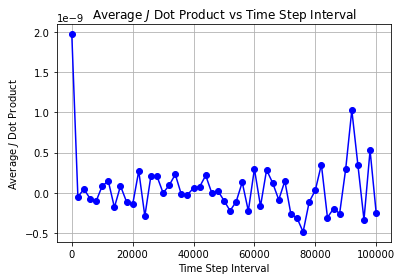

In [8]:
# Call the function to compute the averaged dot products for each time interval
result = dotproduct_av(heatflux_vec)

# Generate time intervals for the x-axis (1, 2, 3, ...)
time_intervals = steps

# Create the plot
plt.plot(time_intervals, result, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Time Step Interval')
plt.ylabel('Average $J$ Dot Product')
plt.title('Average $J$ Dot Product vs Time Step Interval')

# Display the plot
plt.grid(True)
plt.show()

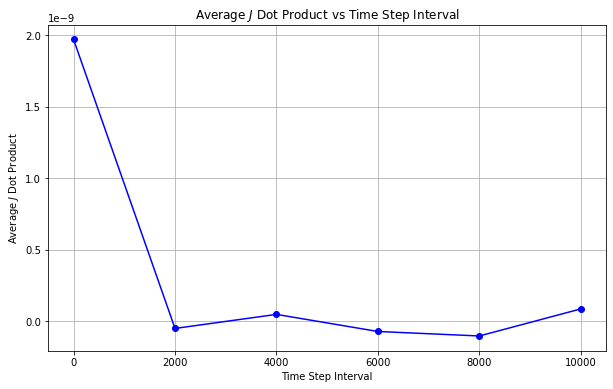

In [9]:
plt.figure(figsize=(10, 6))
# Create the plot
plt.plot(time_intervals[0:6], result[0:6], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Time Step Interval')
plt.ylabel('Average $J$ Dot Product')
plt.title('Average $J$ Dot Product vs Time Step Interval')

# Display the plot
plt.grid(True)
plt.show()

I will

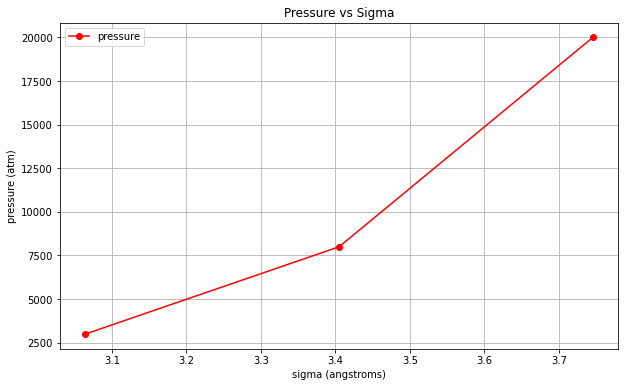

In [10]:
plt.figure(figsize=(10, 6))
# Create the plot

plt.plot([3.0645, 3.405, 3.7455], [3000, 8000, 20000], marker='o', linestyle='-', color='r', label="pressure")

# Add labels and title
plt.xlabel('sigma (angstroms)')
plt.ylabel('pressure (atm)')
plt.title('Pressure vs Sigma')

# Display the plot
plt.grid(True)
plt.legend()
plt.show()

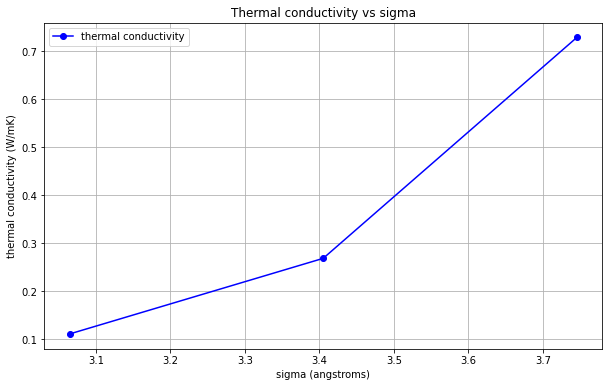

In [11]:
plt.figure(figsize=(10, 6))
# Create the plot
plt.plot([3.0645, 3.405, 3.7455], [0.110385548, 0.268182026, 0.729066628], marker='o', linestyle='-', color='b', label="thermal conductivity")

# Add labels and title
plt.xlabel('sigma (angstroms)')
plt.ylabel('thermal conductivity (W/mK)')
plt.title('Thermal conductivity vs sigma')

# Display the plot
plt.grid(True)
plt.legend()
plt.show()

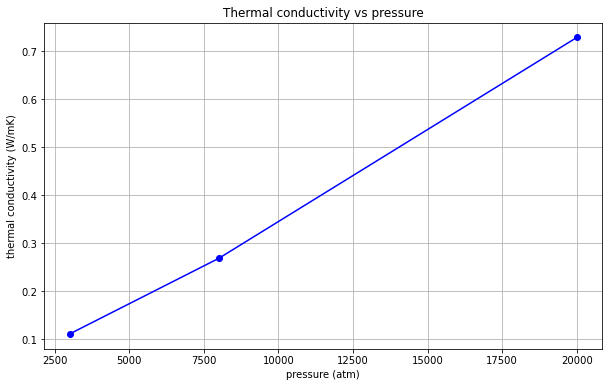

In [12]:
plt.figure(figsize=(10, 6))
# Create the plot
plt.plot([3000, 8000, 20000], [0.110385548, 0.268182026, 0.729066628], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('pressure (atm)')
plt.ylabel('thermal conductivity (W/mK)')
plt.title('Thermal conductivity vs pressure')

# Display the plot
plt.grid(True)
plt.show()